### 7. Bildbearbeitung 1

#### 7.1. Bilddatei lesen und speichern
<center>

![cpp1_a7_dreifach.pgm](cpp1_a7_abb_7_1_dreifach.png)<br>
Abbildung 7.1.: Grauwertbild in der Datei `cpp1_a7_dreifach.pgm`
</center>
In der Datei `cpp1_a7_dreifach.pgm` ist ein Grauwertbild (Abbildung 7.1) der Größe 512 × 256 Bildpunkten
gespeichert. Der Dateianfang ist in Liste 7.1 dargestellt (siehe auch Tabelle 7.1). Eine Bildzeile (512
Grauwerte) ist dabei in 32 aufeinanderfolgenden Dateizeilen gespeichert.

<center>

Liste 7.1: Beginn der pgm-Datei `cpp1_a7_dreifach.pgm`
![Grauwerte cpp1_a7_dreifach.pgm](cpp1_a7_liste_7_1_dreifach.png)
</center>

**PGM-Dateiformat**<br>
PGM steht für [Portable Graymap](https://de.wikipedia.org/wiki/Portable_Graymap).<br>
Im Format "P2" werden die Daten im ASCII-Format gespeichert, so dass Bilddateien in diesem PGM-Format mit einem Texteditor gelesen und bearbeitet werden können.<br>
Zu Anfang der Datei stehen Metadaten des Bildes. Zuerst ein "Magic" ("P2"), das das Format definiert, in dem die Daten in der Datei vorliegen. Dies ist ein String.<br>
Von da an folgen Strings, die als Ganzzahlwerte interpretiert werden müssen, durch beliebige [Whitespace-Zeichen](https://de.wikipedia.org/wiki/Leerraum) getrennt.<br>
Zuerst kommen die Breite und die Höhe des gespeicherten Bildes in Pixeln.<br>
Danach folgt der maximal im Bild vorkommende Grauwert. (Da die Graustufen in Byte-Größe (8 Bit) gespeichert werden, ist jedes Pixel durch seinen Grauwert von "0" (schwarz) bis maximal "255" (weiß) definiert.<br>
Danach folgen die Graustufen-Werte der (Anzahl = Breite x Höhe) Pixel in der Datei, getrennt durch Whitespace-Zeichen. Zeilenumbrüche haben dabei nichts mit dem Ende einer Zeile im Bild zu tun, diese wird nur durch die Breite definiert. 
Der Grauwert jedes Pixels muss im Wertebereich 0 bis zum angegebenen maximalen Grauwert liegen. **Dies ist zu überprüfen**<br>

Die Grauwerte definieren den Grauwert für jedes Pixel im Bild, von oben links nach unten rechts:
$$
\begin{matrix}
gray_{0,0} & gray_{0,1} & gray_{0,2} & ... & gray_{0,width-1} \\
gray_{1,0} & gray_{1,1} & gray_{1,2} & ... & gray_{1,width-1} \\
gray_{2,0} & gray_{2,1} & gray_{2,2} & ... & gray_{2,width-1} \\
... & ... & ... & ... & \\
gray_{height-1,0} & gray_{height-1,1} & gray_{height-1,2} & ... & gray_{height-1,width-1} \\
\end{matrix}
$$

**Speicherung**<br>
Die Daten des Bildes müssen der Bedeutung entsprechend gespeichert werden. Um die unterschiedlichen Wert, die ein PGM-Bild  definieren, mit unterschiedlichen Datentypen zu "transportieren", ist ein Dictionary mit zu verwenden. Da Dicionaries keine festen Variablennamen enthalten, sondern beliebigen (aber eindeutigen) (Key)-Werten je einen (Value)-Wert zuordnen, müssen die Keys für die Verwendung des Dictionaries in unterschiedlichen Funktionen zunächst eindeutig definiert werden:
```
dictName = dict()
dictName['magic']        # Das Magic aus der Datei ("P2").
dictName['width']        # Breite des Bildes in Pixeln.
dictName['height']       # Höhe des Bildes in Pixeln.
dictName['maxgray']      # Maximal vorkommender Grauwert.
dictName['pixels']       # Die Pixel des Bildes. pixels ist eine Liste (von Zeilen),
                         # die für jede Zeile im Bild eine Liste von `int` Grauwerten enthält.
```
Beim Lesen einer PGM-Datei ist ein solches Dictionary zu erstellen und mit den (richtigen) Werten aus der Bilddatei zu füllen.

**Aufgabe**
* Erstellen Sie eine Python-Funktion, die eine PGM-Datei liest und die Bilddaten als Dictionary, wie oben beschrieben, zurück gibt.
* Erstellen Sie eine 2. Python-Funktion, die ein oben beschriebenes Dictionary mit Bilddaten sowie einen Dateinamen übernimmt und das Bild im richtigen Format in eine Datei mit dem übergebenen Namen speichert.
* Testen Sie die Lösung indem Sie
    * Die Datei `cpp1_a7_dreifach.pgm` einlesen und das erzeugte Bild
    * in die Datei `dreifach.out.pgm` schreiben.
    * Behandeln Sie alle mögliche `Error`, die während der Verarbeitung geworfen werden können, auf geeignete Weise.
    * Öffnen Sie die erzeugte Bilddatei mit einem geeigneten Programm.<br> 
    
    
**Anzeige in Jupyter-Notebook**
Mit folgendem Code können Sie ein abgespeichertes Bild in Jupyter-Notbook anzeigen:
```
from IPython.display import display,HTML
from PIL import Image
...
    with Image.open(imageFileName) as image:
	    display(image)
```


**Anzeige mit Standard-Viewer**
Wenn Sie dieses Jupyter-Notebook auf Ihrem eigenen Rechner mit einer lokalen Python-Version z.B. mit VSCode bearbeiten **und** auf Ihrem Rechner ein Standardprogramm für die Anzeige von Bildern installiert und konfiguriert ist, kann dieses zur Anzeige des Bildes von Python aus gestartet werden:

```
import subprocess
...
subprocess.call("open " + imageFileName, shell=True)

```

* Überprüfen Sie, ob die Bilder überein stimmend angezeigt werden. Verwenden Sie für die markanten Bildbestandteile die Vergrößerungsfunktion.

**Nebenbedingungen**<br>
Die Parameter der Funkionen sind zu prüfen.
* Existiert eine Datei mit dem übergebenen Namen, aus der gelesen werden soll?
* Ist der existierende Name wirklich eine Datei (und z.B. kein Verzeichnis, das nicht verwendet werden kann)?

```
import os
...
os.path.exists(fileName) # Existiert fileName?
...
os.path.isfile(fileName) # Ist fileName eine Datei?
```
Anderenfalls ist ein `FileNotFoundError` mit einer aussagekräftigen Fehlermeldung zu werfen.  


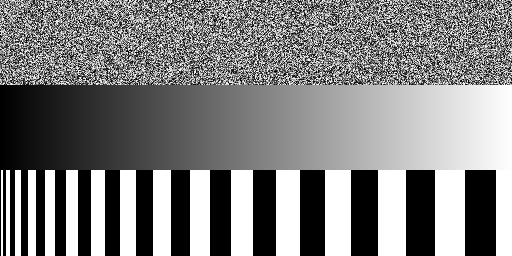

In [1]:
# Lösung 7.1. Bilddatei lesen und speichern
import os
import sys
from IPython.display import display,HTML
from PIL import Image

################################################################################
# Lesen eines PGM Image-Files in ein Dictionary.
# fileName: Pfad zur PGM-Image-Datei
# return  : dict['magic']: Magic der PGM-Datei
#           dict['width']: Breite des Bildes
#           dict['height']: Höhe des Bildes
#           dict['pixels']: Liste von Zeilen mit Liste von Pixeln in einer Zeile
################################################################################
def readPgmImageFile(fileName):
### BEGIN SOLUTION
    
    if (not os.path.exists(fileName)):
        raise FileNotFoundError(f"Datei {fileName} existiert nicht!")
    if (not os.path.isfile(fileName)):
        raise FileNotFoundError(f"Datei {fileName} existiert, ist aber keine Datei!")
    
    image = dict()
    image['pixels']=[]
    itemCount=0
    rowIdx=0
    colIdx=0
    with open(fileName, 'r', encoding='ascii') as file:
            text = file.read()
    for item in text.split():
        if (itemCount==0):
            image['magic']=item
        elif (itemCount==1):
            image['width']=int(item)
        elif (itemCount==2):
            image['height']=int(item)
        elif (itemCount==3):
            image['maxgray']=int(item)
        else:
            # Zeilen-Liste ermitteln
            row = image['pixels'][rowIdx] if len(image['pixels']) > rowIdx else []
            
            # Zeilenumbruch
            if len(row) >= image['width']:
                rowIdx+=1
                colIdx=0
                row=[]
            # Pixelwert einfügen
            pixel = int(item)
            if (pixel < 0 or pixel > image['maxgray']):
                raise ValueError(f"Pixel[{rowIdx}][{colIdx}]Erwarte Pixel 0..{image['maxgray']}, ist aber {pixel}")
            
            row.append(int(item))
            colIdx+=1
            
            # Zeile anhängen, wenn neu
            if (len(row) == 1):
                image['pixels'].append(row)
        itemCount+=1
### END SOLUTION        
    return image # Rückgabe des mit den Bilddaten gefüllten Dictionaries.

################################################################################
# Schreiben eines PGM Image Dictionaries in eine Datei.
# image:    image['magic']: Magic der PGM-Datei
#           image['width']: Breite des Bildes
#           image['height']: Höhe des Bildes
#           image['pixels']: Liste von Zeilen mit Liste von Pixeln in einer Zeile
# fileName: Pfad zur PGM-Image-Datei
################################################################################
def writePgmImageFile(image, fileName):
    try:
### BEGIN SOLUTION
        with open(fileName, 'w', encoding='ascii') as file:
            file.write(f"{image['magic']}\n")
            file.write(f"{image['width']}{image['height']:4d}\n")
            file.write(f"{image['maxgray']}\n")
            for row in image['pixels']:
                for pixel in row:
                    file.write(f"{pixel:4d} ")
                file.write("\n")
### END SOLUTION                
    except PermissionError as e:
        raise OSError(f"Rechte zum Schreiben der Datei {fileName} fehlen")
    except IOError as e:
        raise OSError(f"Fehler bei Schreiben der Datei {fileName}")
    
###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="dreifach.out.pgm"

    image = readPgmImageFile(infile)
    writePgmImageFile(image, outfile)

    with Image.open(outfile) as i:
	    display(i)
 
except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION


#### 7.2.  Grauwertbild bearbeiten

##### 7.2.1 Invertierung
Schreiben Sie eine Python-Funktion, die 
* ein in einem Dictionary (siehe [7.1. Bilddatei lesen und speichern](cpp1_a7_bildbearbeitung.ipynb#71-bilddatei-lesen-und-speichern)) gespeicherte PGM Datei als Parameter übernimmt,
* daraus ein neues Dictionary erzeugt, in dem die Pixelwerte nach der Vorschrift $$ b_{yx} = maxGrauwert - a_{yx}$$ berechnet werden und
* das neue Dictionary zurück gibt.

Es entsteht ein Negativbild: Schwarz wird zu Weiß und umgekehrt. Speichern Sie das neue Bild und kKontrollieren Sie das Ergebnis mit einem Bildbetrachter.

Das Ergebnis sollte so aussehen:
<center>

![cpp1_a7_dreifach.pgm invertiert](cpp1_a7_7_2_1_1_invertierung.png)<br>
Abbildung 7.2.1.1.: `cpp1_a7_dreifach.pgm` nach Invertierung
</center>

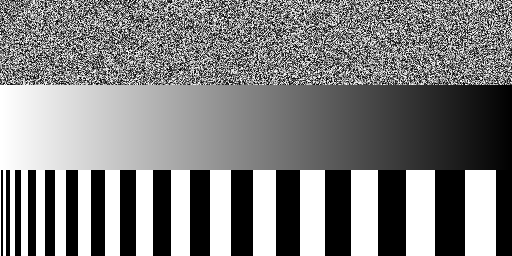

In [2]:
# Loesung 7.1.1 Invertierung
def invertImage(image):
    result = dict();
### BEGIN SOLUTION
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    result['pixels']  = []                    # Die Pixel des Bildes. pixels ist eine Liste (von Zeilen),
    for row in image['pixels']:
        newRow = []
        for pixel in row:
            newRow.append(image['maxgray'] - pixel)
        result['pixels'].append(newRow)
### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="inverted.out.pgm"

    image = readPgmImageFile(infile)
    inverted = invertImage(image)
    writePgmImageFile(inverted, outfile)

    with Image.open(outfile) as i:
	    display(i)

except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

##### 7.2.2 Schwellwertoperation
Schreiben Sie eine Python-Funktion, die 
* ein in einem Dictionary (siehe [7.1. Bilddatei lesen und speichern](cpp1_a7_bildbearbeitung.ipynb#71-bilddatei-lesen-und-speichern)) gespeicherte PGM Datei und einen Schwellwert als Parameter übernimmt,
* daraus ein neues Dictionary erzeugt, in dem die Pixelwerte nach der Vorschrift definiert werden in der<br>
$ b_{yx} = 0 $ ist, wenn gilt: $ a_{yx} < Schwellwert $ und <br>
$ b_{yx} = maxGrauwert $ ist, wenn gilt: $ a_{yx} >= Schwellwert $.
* Die Funktion gibt das neue Dictionary zurück.

Kontrollieren Sie das Ergebnis auf die gleiche Art wie unter [7.2.1 Invertierung](cpp1_a7_bildbearbeitung.ipynb#721-invertierung) und verwenden Sie dabei den Schwellwert `150`.

Das Ergebnis sollte so aussehen:
<center>

![cpp1_a7_dreifach.pgm nach Schwellwertverarbeitung](cpp1_a7_7_2_2_1_schwellwert.png)<br>
Abbildung 7.2.2.1: `cpp1_a7_dreifach.pgm` nach Schwellwert-Verarbeitung mit Schwellwert 150
</center>


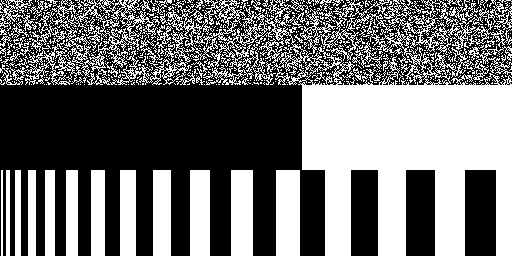

In [3]:
# Loesung 7.1.2 Schwellwert
def thresholdImage(image, threshold):
    result = dict();
### BEGIN SOLUTION
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    result['pixels']  = []                    # Die Pixel des Bildes. pixels ist eine Liste (von Zeilen),
    for row in image['pixels']:
        newRow = []
        for pixel in row:
            newRow.append(0 if pixel < threshold else image['maxgray'])
        result['pixels'].append(newRow)
### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="threshold.out.pgm"

    image = readPgmImageFile(infile)
    inverted = thresholdImage(image, 150)
    writePgmImageFile(inverted, outfile)

    with Image.open(outfile) as i:
	    display(i)

except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

##### 7.2.3 Glättung
Bei der Glättung entsteht das Zielpixel durch Mittelwertbildung über das Originalpixel und dessen 8 Umgebungspixel (Abbildung 7.3). Durch die Glättung werden harte Kontraste gemildert.
<center>

![Glättung](cpp1_a7_7_2_3_1_glaettung.png)<br>
Abbildung 7.2.3.1.: Glättung durch Mittelwertbildung über 9 Bildpunkte
</center>

Schreiben Sie eine Python-Funktion, die 
* ein in einem Dictionary (siehe [7.1. Bilddatei lesen und speichern](cpp1_a7_bildbearbeitung.ipynb#71-bilddatei-lesen-und-speichern)) gespeicherte PGM Datei als Parameter übernimmt,
* daraus ein neues Dictionary erzeugt, in dem die Pixelwerte nach der in Abbildung 7.3 gezeigten Verfahren geglättet werden 
* die Randpixel des Zielbildes auf Schwarz setzt und
* das neue Dictionary zurück gibt.

**Hinweis!**<br>
Nach diesem Verfahren können die äußersten Pixel des Bildes nicht verarbeitet werden, weil Nachbarpixel fehlen. In diesem Fall muss festgelegt werden, wie diese im Ergebnisbild erscheinen sollen.<br>
Zur besseren Erkennbarkeit setzen Sie den Wert der äußersten Pixel des Ergebnisbildes auf 0 (schwarz).

**Wichtig!**<br>
Das Ergebnis der Berechnung des Mittelwerts muss zwingend mit `int(mw)` auf `int` gecastet werden, bevor es als Pixel dem Ergebniswert zugewiesen werden darf!

Kontrollieren Sie das Ergebnis auf die gleiche Art wie unter [7.2.1 Invertierung](cpp1_a7_bildbearbeitung.ipynb#721-invertierung)

Das Ergebnis sollte so aussehen:
<center>

![cpp1_a7_dreifach.pgm nach Glättung](cpp1_a7_7_2_3_2_glaettung.png)<br>
Abbildung 7.2.3.2: `cpp1_a7_dreifach.pgm` nach Glättung
</center>


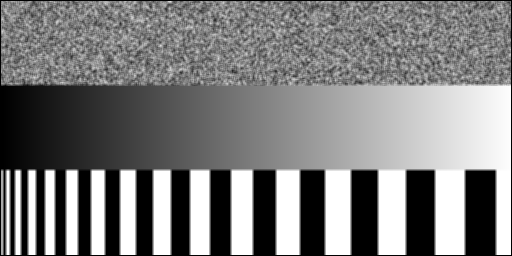

In [4]:
# Loesung 7.1.3 Glaettung
def blackRow(width):
    result = []
    for x in range(0, width):
        result.append(0)
    return result

def smoothedImage(image):
    result = dict();
### BEGIN SOLUTION

# Die Lösung ist wegen sich wiederholenden Codes nicht optimal.
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    result['pixels']  = []                    # Die Pixel des Bildes. pixels ist eine Liste (von Zeilen),
    
    # Erste Zeile schwarz
    result['pixels'].append(blackRow(image['width']))
    for y in range(1, image['height']-1):
        newRow = []
        # Erster Spalte schwarz
        newRow.append(0)
        for x in range(1, image['width']-1):
            pixel = 0;
            for dy in [-1, 0, 1]:
                for dx in [-1, 0, 1]:
                    pixel += image['pixels'][y+dy][x+dx]
            newRow.append(int(pixel/9))
        # Letzte Spalte schwarz
        newRow.append(0)
        result['pixels'].append(newRow)
    
    # Letzte Zeile schwarz
    result['pixels'].append(blackRow(image['width']))
    
### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="smoothed.out.pgm"

    image = readPgmImageFile(infile)
    inverted = smoothedImage(image)
    writePgmImageFile(inverted, outfile)

    with Image.open(outfile) as i:
	    display(i)

except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

##### 7.2.4 Kantenerkennung
Objektkanten sind dort zu vermuten, wo sprungartige Helligkeitsübergänge vorhanden sind. Um Kanten rechnerisch zu ermitteln wird über das Bild ein sogenanntes Operatorfenster geschoben. Der aktuelle Bildpunkt und die 8 Nachbarpunkte werden mit den Gewichtungen in Abbildung 7.4 multipliziert, addiert und zur Normierung durch 9 geteilt. Der Betrag dieses Ergebnisses ist der Wert des Zielbildpunktes. Wie bei der Glättung kann diese Operation nur auf die inneren Punkte des Originals angewendet werden. Zur Bildung des Betrages steht die Bibliotheksfunktion `math.abs()` zur Verfügung.
<center>

![Kantenerkennung](cpp1_a7_liste_7_2_4_1_kantenerkennung.png) !<br>
Abbildung 7.2.4.1.: Kantenerkennung durch gewichtete Mittelwertbildung über 9 Bildpunkte
</center>

Wie bei der Glättung müssen die Ränder des Zielbildes bei Kantenerkennung auf schwarz gesetzt werden.

Schreiben Sie eine Python-Funktion, die 
* ein in einem Dictionary (siehe [7.1. Bilddatei lesen und speichern](cpp1_a7_bildbearbeitung.ipynb#71-bilddatei-lesen-und-speichern)) gespeicherte PGM Datei als Parameter übernimmt,
* daraus ein neues Dictionary erzeugt, in dem die Pixelwerte nach der in Abbildung 7.4 gezeigten Verfahren verarbeitet werden 
* die Randpixel des Zielbildes auf Schwarz setzt und
* das neue Dictionary zurück gibt.

**Wichtig!**<br>
wie in [7.2.3 Glättung](cpp1_a7_bildbearbeitung.ipynb#723-glättung) gilt, dass das Ergebnis der Berechnung des Mittelwerts zwingend mit `int(mw)` auf `int` gecastet werden muss, bevor es als Pixel dem Ergebniswert zugewiesen werden darf!

Kontrollieren Sie das Ergebnis auf die gleiche Art wie unter [7.2.1 Invertierung](cpp1_a7_bildbearbeitung.ipynb#721-invertierung)

Das Ergebnis sollte so aussehen:
<center>

![cpp1_a7_dreifach.pgm nach Kantenerkennung](cpp1_a7_7_2_4_2_kantenerkennung.png)<br>
Abbildung 7.2.4.2: `cpp1_a7_dreifach.pgm` nach Kantenerkennung
</center>


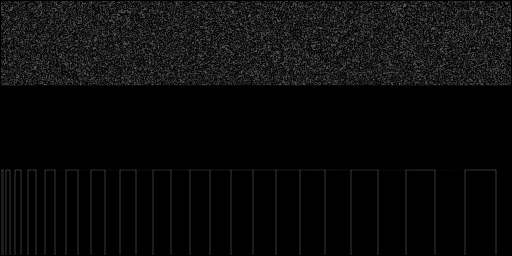

In [5]:
# Loesung 7.1.4 Kantenerkennung
def blackRow(width):
    result = []
    for x in range(0, width):
        result.append(0)
    return result

def smoothedImage(image):
    result = dict();
### BEGIN SOLUTION
    weights = [[0, -1, 0], [-1, 4 ,-1], [0, -1, 0]]

# Die Lösung ist wegen sich wiederholenden Codes nicht optimal.
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    result['pixels']  = []                    # Die Pixel des Bildes. pixels ist eine Liste (von Zeilen),
    
    # Erste Zeile schwarz
    result['pixels'].append(blackRow(image['width']))
         
    for y in range(1, image['height']-1):
        newRow = []
        # Erster Spalte schwarz
        newRow.append(0)
        for x in range(1, image['width']-1):
            pixel = 0;
            w_y=0
            for dy in [-1, 0, 1]:
                w_x=0
                for dx in [-1, 0, 1]:
                    pixel += image['pixels'][y+dy][x+dx] * weights[w_y][w_x]
                    w_x += 1
                w_y += 1
            newRow.append(abs(int(pixel/9)))
        # Letzte Spalte schwarz
        newRow.append(0)
        result['pixels'].append(newRow)
    
    # Letzte Zeile schwarz
    result['pixels'].append(blackRow(image['width']))

### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="edged.out.pgm"

    image = readPgmImageFile(infile)
    inverted = smoothedImage(image)
    writePgmImageFile(inverted, outfile)

    with Image.open(outfile) as i:
	    display(i)
except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    